## *santoshhulbutti@gmail.com | DataTrained | Evaluation Project # 10

## Zomato_Restaurant_Cuisine_Price & Range prediction

<h1 align = "center"><font color = "red">Importing necessary libraries</font></h1>

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

pd.set_option('max_columns', None)

import statsmodels.api as sm

from collections import Counter

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

#logistic Regression
from sklearn.linear_model import LogisticRegression

# Random Forest Classifier & Gradient Boosting Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

#C-Support Vector Classification
from sklearn.svm import SVC


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, accuracy_score, roc_curve, auc




from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




import pickle

import warnings
warnings.filterwarnings('ignore')

<h1 align = "center"><font color = "red">Getting the Data</font></h1>

In [194]:
# import chardet
# with open('zomato.csv', 'rb') as rawdata:
#     result = chardet.detect(rawdata.read(1000))
# result

In [195]:
data01 = pd.read_csv('zomato.csv',sep=',', encoding='latin-1')
data02 = pd.read_excel(r"Country-Code.xlsx")

This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
1. Country code
2. Country name


The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the
following variables:
- Restaurant Id: Unique id of every restaurant across various cities of the world
- Restaurant Name: Name of the restaurant
- Country Code: Country in which restaurant is located
- City: City in which restaurant is located
- Address: Address of the restaurant
- Locality: Location in the city
- Locality Verbose: Detailed description of the locality
- Longitude: Longitude coordinate of the restaurants location
- Latitude: Latitude coordinate of the restaurants location
- Cuisines: Cuisines offered by the restaurant
- Average Cost for two: Cost for two people in different currencies
- Currency: Currency of the country
- Has Table booking: yes/no
- Has Online delivery: yes/ no
- Is delivering: yes/ no
- Switch to order menu: yes/no
- Price range: range of price of food
- Aggregate Rating: Average rating out of 5
- Rating color: depending upon the average rating color
- Rating text: text on the basis of rating of rating
- Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range

<h1 align = "center"><font color = "red">EDA : Data analysis, pre processing, feature engineering</font></h1>

In [197]:
data01.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


In [198]:
unique_null_data = pd.DataFrame(list(zip(data01.nunique(), data01.isnull().sum(), data01.dtypes)),
                                columns = ['unique_entries', 'missing values', 'Dtypes'],
                               index=data01.columns)
unique_null_data

,unique_entries,missing values,Dtypes
Restaurant ID,9551,0,int64
Restaurant Name,7446,0,object
Country Code,15,0,int64
City,141,0,object
Address,8918,0,object
Locality,1208,0,object
Locality Verbose,1265,0,object
Longitude,8120,0,float64
Latitude,8677,0,float64
Cuisines,1825,9,object


In [199]:
data01.shape

(9551, 21)

In [200]:
data02

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [201]:
data01['Country Code'].nunique()

15

In [202]:
data01['Country Code'].value_counts()

1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64

In [203]:
data01['Country Code'].value_counts()*100/data01.shape[0]

1      90.587373
216     4.544027
215     0.837609
30      0.628206
214     0.628206
189     0.628206
148     0.418804
208     0.355984
14      0.251283
162     0.230342
94      0.219872
184     0.209402
166     0.209402
191     0.209402
37      0.041880
Name: Country Code, dtype: float64

In [204]:
data01['City'].value_counts().head(12)

New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
Bhubaneshwar        21
Amritsar            21
Ahmedabad           21
Lucknow             21
Guwahati            21
Ludhiana            20
Rest of Hawaii      20
Name: City, dtype: int64

In [205]:
data01.dtypes.value_counts()

object     13
int64       5
float64     3
dtype: int64

### Observations:
- The dataset has 6 missing values in cuisine features.
- there are 13 object type of features.. most of them are categorical in nature.
- 5 integer type of features are present in the given dataset.
    - out of these Restaurant ID & Country Code are nominal data.
    - Price range is ordianl data  as it indicates category of price range; 1 being cheaper & 4 being costlier.
    - Price range is our label feature for classification model
    - Average Cost for two is also integer type of data.. & it is the target feature for regression model.
- 3 Float type of variables are present in given dataset,
    - Longitude & latitude are the location coordinates.
    - Aggregate rating is the average votes given to restaurants by customers out of 5.



## As More than 90% of the data is from india only, We will drop all data from other countries . out of the 90%, 90% of the data is from delhi only. We will build a model which will predict Avg cost & price range for delhi location only.
# 

In [249]:
data0 = data01.loc[np.where((data01['City'] == 'New Delhi')| (data01['City'] == 'Gurgaon')|(data01['City'] == 'Noida')|(data01['City'] == 'Faridabad')|(data01['City'] == 'Ghaziabad'))[0]]

### Removing datas where longitude & latitude have 0 entry..

In [252]:
data_loc_remove = np.where((data0['Longitude']==0) | (data0['Latitude']==0))[0]
data_loc_remove

array([   8,   14,   54,   63,   73,  103,  128,  130,  133,  137,  142,
        145,  150,  151,  154,  183,  184,  186,  192,  224,  227,  238,
        294,  301,  441,  443,  444,  469,  740,  764,  781,  785,  788,
        792,  838,  846,  849,  860,  897,  899,  904,  905,  913,  924,
        927,  929,  933, 1003, 1030, 1032, 1034, 1059, 1062, 1073, 1082,
       1084, 1091, 1106, 1113, 1118, 1119, 1120, 1132, 1190, 1232, 1250,
       1318, 1340, 1363, 1379, 1394, 1427, 1452, 1558, 1722, 1732, 1764,
       1769, 1771, 1790, 1793, 1997, 1998, 2000, 2013, 2022, 2231, 2296,
       2303, 2322, 2327, 2329, 2331, 2332, 2333, 2335, 2337, 2346, 2348,
       2359, 2395, 2443, 2453, 2455, 2457, 2461, 2463, 2471, 2472, 2493,
       2510, 2610, 2617, 2619, 2624, 2634, 2654, 2655, 2659, 2666, 2682,
       2693, 2694, 2719, 2738, 2802, 2803, 2859, 2867, 2895, 2900, 2905,
       2911, 2924, 3130, 3148, 3205, 3216, 3290, 3291, 3298, 3310, 3338,
       3360, 3370, 3434, 3558, 3569, 3571, 3581, 36

In [253]:
data0 = data0.drop(data0.index[data_loc_remove])

In [254]:
data_loc_remove2 = np.where((data0['Longitude']<40))[0]
print(data_loc_remove2)
            
data0 = data0.drop(data0.index[data_loc_remove2])

[2249]


### Dropping following features :
    - 'Restaurant ID','Restaurant Name','Country Code','Address','Locality','Locality Verbose','Currency'

In [255]:
data0.drop(columns = ['Restaurant ID','Restaurant Name','Country Code','Address','Locality','Locality Verbose','Currency'],inplace=True)

In [257]:
data0_c = data0[data0['Cuisines'].notnull()] # filtering out the null values from the data
data0_c

,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
865,Faridabad,77.306640,28.490059,"Chinese, Fast Food, Bakery",250,No,No,No,No,1,2.9,Orange,Average,4
866,Faridabad,77.304776,28.490157,"North Indian, Chinese",500,No,No,No,No,2,2.8,Orange,Average,16
867,Faridabad,77.305563,28.490137,North Indian,150,No,No,No,No,1,2.8,Orange,Average,8
868,Faridabad,77.306102,28.490098,North Indian,150,No,No,No,No,1,2.9,Orange,Average,8
869,Faridabad,77.305745,28.490062,Bakery,100,No,No,No,No,1,2.8,Orange,Average,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9108,Noida,77.367524,28.557537,"North Indian, Chinese",700,No,Yes,No,No,2,2.6,Orange,Average,34
9109,Noida,77.367303,28.557929,Fast Food,400,No,No,No,No,1,0.0,White,Not rated,1
9110,Noida,77.367188,28.557842,Fast Food,600,No,No,No,No,2,0.0,White,Not rated,3
9111,Noida,77.367322,28.557930,"North Indian, Chinese",500,No,No,No,No,2,0.0,White,Not rated,0


## Separating cuisine entries in each restaurant..

In [258]:
cuisines = data0_c['Cuisines'].apply(lambda x: pd.Series(x.split(', '))) # splitting the column 'Cuisine' into multiple columns 

In [259]:
cuisines.columns=['Cuisine 1','Cuisine 2','Cuisine 3','Cuisine 4','Cuisine 5','Cuisine 6','Cuisine 7','Cuisine 8']# renaming the columns
cuisines.head()

,Cuisine 1,Cuisine 2,Cuisine 3,Cuisine 4,Cuisine 5,Cuisine 6,Cuisine 7,Cuisine 8
865,Chinese,Fast Food,Bakery,NaN,NaN,NaN,NaN,NaN
866,North Indian,Chinese,NaN,NaN,NaN,NaN,NaN,NaN
867,North Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
868,North Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
869,Bakery,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [260]:
data1 = pd.concat([data0, cuisines], axis=1) #concating the two dataframes 
data1.head()

,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisine 1,Cuisine 2,Cuisine 3,Cuisine 4,Cuisine 5,Cuisine 6,Cuisine 7,Cuisine 8
865,Faridabad,77.306640,28.490059,"Chinese, Fast Food, Bakery",250,No,No,No,No,1,2.9,Orange,Average,4,Chinese,Fast Food,Bakery,NaN,NaN,NaN,NaN,NaN
866,Faridabad,77.304776,28.490157,"North Indian, Chinese",500,No,No,No,No,2,2.8,Orange,Average,16,North Indian,Chinese,NaN,NaN,NaN,NaN,NaN,NaN
867,Faridabad,77.305563,28.490137,North Indian,150,No,No,No,No,1,2.8,Orange,Average,8,North Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
868,Faridabad,77.306102,28.490098,North Indian,150,No,No,No,No,1,2.9,Orange,Average,8,North Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
869,Faridabad,77.305745,28.490062,Bakery,100,No,No,No,No,1,2.8,Orange,Average,7,Bakery,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
city_wise_cuisine = pd.DataFrame(data1[['City','Cuisine 1','Cuisine 2','Cuisine 3','Cuisine 4','Cuisine 5','Cuisine 6','Cuisine 7','Cuisine 8']])
city_wise_cuisine_stack = pd.DataFrame(city_wise_cuisine.stack()) #stacking the columns 
city_wise_cuisine

,City,Cuisine 1,Cuisine 2,Cuisine 3,Cuisine 4,Cuisine 5,Cuisine 6,Cuisine 7,Cuisine 8
865,Faridabad,Chinese,Fast Food,Bakery,NaN,NaN,NaN,NaN,NaN
866,Faridabad,North Indian,Chinese,NaN,NaN,NaN,NaN,NaN,NaN
867,Faridabad,North Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
868,Faridabad,North Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
869,Faridabad,Bakery,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9108,Noida,North Indian,Chinese,NaN,NaN,NaN,NaN,NaN,NaN
9109,Noida,Fast Food,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9110,Noida,Fast Food,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9111,Noida,North Indian,Chinese,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
cuisine_list = list(set(city_wise_cuisine['Cuisine 1'].unique().tolist()+
                        city_wise_cuisine['Cuisine 2'].unique().tolist()+
                        city_wise_cuisine['Cuisine 3'].unique().tolist()+
                        city_wise_cuisine['Cuisine 4'].unique().tolist()+
                        city_wise_cuisine['Cuisine 5'].unique().tolist()+
                        city_wise_cuisine['Cuisine 6'].unique().tolist()+
                        city_wise_cuisine['Cuisine 7'].unique().tolist()+
                        city_wise_cuisine['Cuisine 8'].unique().tolist()))

In [263]:
cuisine_list.pop(0)

nan

In [264]:
data2 = data1.drop(columns = ['Cuisine 1','Cuisine 2','Cuisine 3','Cuisine 4','Cuisine 5','Cuisine 6','Cuisine 7','Cuisine 8'])
data2.reset_index(drop=True,inplace=True)
data2

,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Faridabad,77.306640,28.490059,"Chinese, Fast Food, Bakery",250,No,No,No,No,1,2.9,Orange,Average,4
1,Faridabad,77.304776,28.490157,"North Indian, Chinese",500,No,No,No,No,2,2.8,Orange,Average,16
2,Faridabad,77.305563,28.490137,North Indian,150,No,No,No,No,1,2.8,Orange,Average,8
3,Faridabad,77.306102,28.490098,North Indian,150,No,No,No,No,1,2.9,Orange,Average,8
4,Faridabad,77.305745,28.490062,Bakery,100,No,No,No,No,1,2.8,Orange,Average,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7544,Noida,77.367524,28.557537,"North Indian, Chinese",700,No,Yes,No,No,2,2.6,Orange,Average,34
7545,Noida,77.367303,28.557929,Fast Food,400,No,No,No,No,1,0.0,White,Not rated,1
7546,Noida,77.367188,28.557842,Fast Food,600,No,No,No,No,2,0.0,White,Not rated,3
7547,Noida,77.367322,28.557930,"North Indian, Chinese",500,No,No,No,No,2,0.0,White,Not rated,0


In [265]:
data_eda = data2.copy()

## Creating individual features for each type of cuisine..

In [266]:
for cuis in cuisine_list:
    data2[cuis] = 0

In [267]:
for i in data2.index:
    cuiss = data2.loc[i, 'Cuisines'].split(', ')
    for item in cuiss:
        data2.loc[i, item] = 1

data2

,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Italian,Mithai,Naga,Armenian,Persian,Burger,Beverages,Bakery,Assamese,Maharashtrian,Hyderabadi,Asian,Goan,South Indian,Lucknowi,Spanish,Portuguese,Mangalorean,Indonesian,Bengali,British,Vietnamese,Tibetan,Ice Cream,Drinks Only,Middle Eastern,Juices,North Eastern,Mughlai,Burmese,Pizza,Awadhi,South American,Charcoal Grill,Cafe,Fast Food,Deli,Arabian,Raw Meats,Kerala,Continental,Kashmiri,Greek,Salad,Desserts,Parsi,Finger Food,Gujarati,Mediterranean,American,Pakistani,Seafood,Andhra,Turkish,Indian,Mexican,Chinese,Iranian,Afghani,Bihari,Lebanese,North Indian,Korean,Malaysian,Sandwich,Tea,European,Japanese,Oriya,Belgian,French,Street Food,Sushi,Tex-Mex,African,Nepalese,Modern Indian,Rajasthani,Moroccan,Thai,Sri Lankan,Healthy Food,Steak,Biryani,Chettinad
0,Faridabad,77.306640,28.490059,"Chinese, Fast Food, Bakery",250,No,No,No,No,1,2.9,Orange,Average,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Faridabad,77.304776,28.490157,"North Indian, Chinese",500,No,No,No,No,2,2.8,Orange,Average,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Faridabad,77.305563,28.490137,North Indian,150,No,No,No,No,1,2.8,Orange,Average,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Faridabad,77.306102,28.490098,North Indian,150,No,No,No,No,1,2.9,Orange,Average,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Faridabad,77.305745,28.490062,Bakery,100,No,No,No,No,1,2.8,Orange,Average,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7544,Noida,77.367524,28.557537,"North Indian, Chinese",700,No,Yes,No,No,2,2.6,Orange,Average,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7545,Noida,77.367303,28.557929,Fast Food,400,No,No,No,No,1,0.0,White,Not rated,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7546,Noida,77.367188,28.557842,Fast Food,600,No,No,No,No,2,0.0,White,Not rated,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7547,Noida,77.367322,28.557930,"North Indian, Chinese",500,No,No,No,No,2,0.0,White,Not rated,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [322]:
#dropping 'Cuisines','Rating color'
data3 = data2.drop(columns = ['Cuisines','Rating color'])
data3

,City,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Italian,Mithai,Naga,Armenian,Persian,Burger,Beverages,Bakery,Assamese,Maharashtrian,Hyderabadi,Asian,Goan,South Indian,Lucknowi,Spanish,Portuguese,Mangalorean,Indonesian,Bengali,British,Vietnamese,Tibetan,Ice Cream,Drinks Only,Middle Eastern,Juices,North Eastern,Mughlai,Burmese,Pizza,Awadhi,South American,Charcoal Grill,Cafe,Fast Food,Deli,Arabian,Raw Meats,Kerala,Continental,Kashmiri,Greek,Salad,Desserts,Parsi,Finger Food,Gujarati,Mediterranean,American,Pakistani,Seafood,Andhra,Turkish,Indian,Mexican,Chinese,Iranian,Afghani,Bihari,Lebanese,North Indian,Korean,Malaysian,Sandwich,Tea,European,Japanese,Oriya,Belgian,French,Street Food,Sushi,Tex-Mex,African,Nepalese,Modern Indian,Rajasthani,Moroccan,Thai,Sri Lankan,Healthy Food,Steak,Biryani,Chettinad
0,Faridabad,77.306640,28.490059,250,No,No,No,No,1,2.9,Average,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Faridabad,77.304776,28.490157,500,No,No,No,No,2,2.8,Average,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Faridabad,77.305563,28.490137,150,No,No,No,No,1,2.8,Average,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Faridabad,77.306102,28.490098,150,No,No,No,No,1,2.9,Average,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Faridabad,77.305745,28.490062,100,No,No,No,No,1,2.8,Average,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7544,Noida,77.367524,28.557537,700,No,Yes,No,No,2,2.6,Average,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7545,Noida,77.367303,28.557929,400,No,No,No,No,1,0.0,Not rated,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7546,Noida,77.367188,28.557842,600,No,No,No,No,2,0.0,Not rated,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7547,Noida,77.367322,28.557930,500,No,No,No,No,2,0.0,Not rated,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [323]:
# Dropping duplicate entries
data3.duplicated().sum()

1

In [324]:
to_remove = data3[data3.duplicated()].index.tolist()

In [325]:
data3.drop_duplicates(inplace=True)
data3.reset_index(drop=True, inplace=True)
data3

,City,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Italian,Mithai,Naga,Armenian,Persian,Burger,Beverages,Bakery,Assamese,Maharashtrian,Hyderabadi,Asian,Goan,South Indian,Lucknowi,Spanish,Portuguese,Mangalorean,Indonesian,Bengali,British,Vietnamese,Tibetan,Ice Cream,Drinks Only,Middle Eastern,Juices,North Eastern,Mughlai,Burmese,Pizza,Awadhi,South American,Charcoal Grill,Cafe,Fast Food,Deli,Arabian,Raw Meats,Kerala,Continental,Kashmiri,Greek,Salad,Desserts,Parsi,Finger Food,Gujarati,Mediterranean,American,Pakistani,Seafood,Andhra,Turkish,Indian,Mexican,Chinese,Iranian,Afghani,Bihari,Lebanese,North Indian,Korean,Malaysian,Sandwich,Tea,European,Japanese,Oriya,Belgian,French,Street Food,Sushi,Tex-Mex,African,Nepalese,Modern Indian,Rajasthani,Moroccan,Thai,Sri Lankan,Healthy Food,Steak,Biryani,Chettinad
0,Faridabad,77.306640,28.490059,250,No,No,No,No,1,2.9,Average,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Faridabad,77.304776,28.490157,500,No,No,No,No,2,2.8,Average,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Faridabad,77.305563,28.490137,150,No,No,No,No,1,2.8,Average,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Faridabad,77.306102,28.490098,150,No,No,No,No,1,2.9,Average,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Faridabad,77.305745,28.490062,100,No,No,No,No,1,2.8,Average,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7543,Noida,77.367524,28.557537,700,No,Yes,No,No,2,2.6,Average,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7544,Noida,77.367303,28.557929,400,No,No,No,No,1,0.0,Not rated,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7545,Noida,77.367188,28.557842,600,No,No,No,No,2,0.0,Not rated,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7546,Noida,77.367322,28.557930,500,No,No,No,No,2,0.0,Not rated,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Encoding some of the categorical features

In [326]:
rate_text_dict = {'Not rated':0, 'Poor' :1, 'Average':2,'Good':3, 'Very Good' :4, 'Excellent':5}
yes_no_dict = {'Yes':1, 'No':0}

colms = ['Has Table booking','Has Online delivery','Is delivering now','Switch to order menu']
for col in colms:
    data3[col] = data3[col].map(yes_no_dict)
    
data3['Rating text'] = data3['Rating text'].map(rate_text_dict)

data3

,City,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Italian,Mithai,Naga,Armenian,Persian,Burger,Beverages,Bakery,Assamese,Maharashtrian,Hyderabadi,Asian,Goan,South Indian,Lucknowi,Spanish,Portuguese,Mangalorean,Indonesian,Bengali,British,Vietnamese,Tibetan,Ice Cream,Drinks Only,Middle Eastern,Juices,North Eastern,Mughlai,Burmese,Pizza,Awadhi,South American,Charcoal Grill,Cafe,Fast Food,Deli,Arabian,Raw Meats,Kerala,Continental,Kashmiri,Greek,Salad,Desserts,Parsi,Finger Food,Gujarati,Mediterranean,American,Pakistani,Seafood,Andhra,Turkish,Indian,Mexican,Chinese,Iranian,Afghani,Bihari,Lebanese,North Indian,Korean,Malaysian,Sandwich,Tea,European,Japanese,Oriya,Belgian,French,Street Food,Sushi,Tex-Mex,African,Nepalese,Modern Indian,Rajasthani,Moroccan,Thai,Sri Lankan,Healthy Food,Steak,Biryani,Chettinad
0,Faridabad,77.306640,28.490059,250,0,0,0,0,1,2.9,2,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Faridabad,77.304776,28.490157,500,0,0,0,0,2,2.8,2,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Faridabad,77.305563,28.490137,150,0,0,0,0,1,2.8,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Faridabad,77.306102,28.490098,150,0,0,0,0,1,2.9,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Faridabad,77.305745,28.490062,100,0,0,0,0,1,2.8,2,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7543,Noida,77.367524,28.557537,700,0,1,0,0,2,2.6,2,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7544,Noida,77.367303,28.557929,400,0,0,0,0,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7545,Noida,77.367188,28.557842,600,0,0,0,0,2,0.0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7546,Noida,77.367322,28.557930,500,0,0,0,0,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [363]:
data4 = pd.get_dummies(data3, drop_first = True)
data4

,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Italian,Mithai,Naga,Armenian,Persian,Burger,Beverages,Bakery,Assamese,Maharashtrian,Hyderabadi,Asian,Goan,South Indian,Lucknowi,Spanish,Portuguese,Mangalorean,Indonesian,Bengali,British,Vietnamese,Tibetan,Ice Cream,Drinks Only,Middle Eastern,Juices,North Eastern,Mughlai,Burmese,Pizza,Awadhi,South American,Charcoal Grill,Cafe,Fast Food,Deli,Arabian,Raw Meats,Kerala,Continental,Kashmiri,Greek,Salad,Desserts,Parsi,Finger Food,Gujarati,Mediterranean,American,Pakistani,Seafood,Andhra,Turkish,Indian,Mexican,Chinese,Iranian,Afghani,Bihari,Lebanese,North Indian,Korean,Malaysian,Sandwich,Tea,European,Japanese,Oriya,Belgian,French,Street Food,Sushi,Tex-Mex,African,Nepalese,Modern Indian,Rajasthani,Moroccan,Thai,Sri Lankan,Healthy Food,Steak,Biryani,Chettinad,City_Ghaziabad,City_Gurgaon,City_New Delhi,City_Noida
0,77.306640,28.490059,250,0,0,0,0,1,2.9,2,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77.304776,28.490157,500,0,0,0,0,2,2.8,2,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,77.305563,28.490137,150,0,0,0,0,1,2.8,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,77.306102,28.490098,150,0,0,0,0,1,2.9,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,77.305745,28.490062,100,0,0,0,0,1,2.8,2,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7543,77.367524,28.557537,700,0,1,0,0,2,2.6,2,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7544,77.367303,28.557929,400,0,0,0,0,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7545,77.367188,28.557842,600,0,0,0,0,2,0.0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7546,77.367322,28.557930,500,0,0,0,0,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [364]:
data4.dtypes.value_counts()

int64      93
uint8       4
float64     3
dtype: int64

In [365]:
data4['Price range'].value_counts()

1    3954
2    2485
3     808
4     301
Name: Price range, dtype: int64

In [366]:
data4.isnull().sum().sum()

0

<h1 align = "center"><font color = "red">EDA : Data Visualization</font></h1>

## Target variable : Average Cost for two distribution

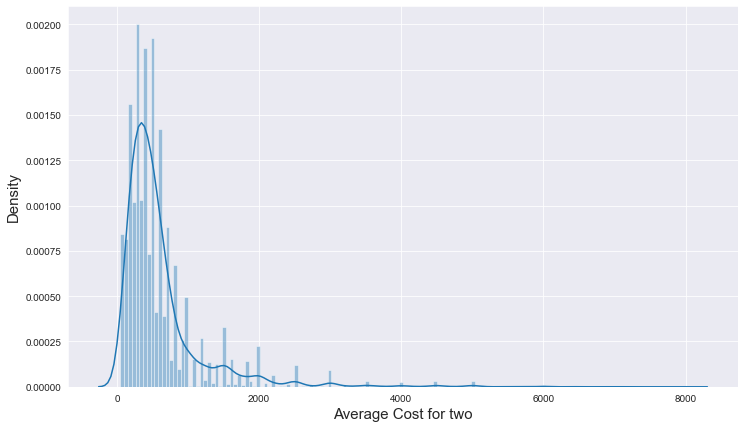

In [367]:
plt.figure(figsize=(12,7))
sns.distplot(data4['Average Cost for two'], bins=150);
plt.xlabel('Average Cost for two',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.show()

## Observation:
- The 'Average Cost for two' seems to be skewed & also having some outliers present.
- most of the prices are within the range of 0 to 1500

## Target variable : Price range distribution

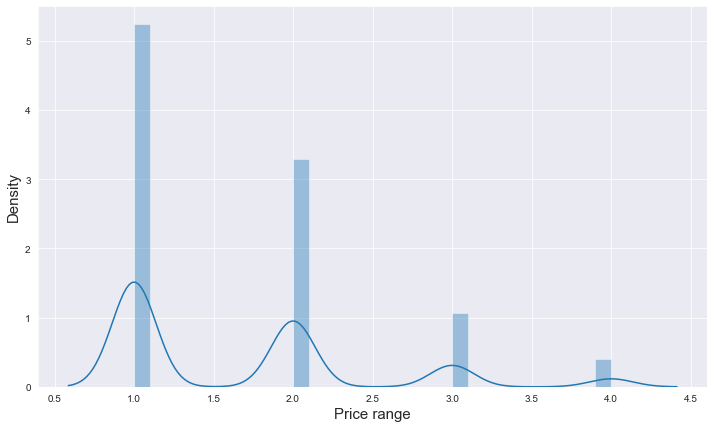

In [368]:
plt.figure(figsize=(12,7))
sns.distplot(data4['Price range']);
plt.xlabel('Price range',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.show()

## Observation:
- The 'Price range' is an ordinal category feature.
- There are mostly restaurants which offer food with cheaper price.

In [369]:
data0_c = data0_c.drop(data0_c.index[to_remove])

In [370]:
data0_c.drop_duplicates(inplace=True)
data0_c.reset_index(drop=True, inplace=True)
data0_c

,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Faridabad,77.306640,28.490059,"Chinese, Fast Food, Bakery",250,No,No,No,No,1,2.9,Orange,Average,4
1,Faridabad,77.304776,28.490157,"North Indian, Chinese",500,No,No,No,No,2,2.8,Orange,Average,16
2,Faridabad,77.305563,28.490137,North Indian,150,No,No,No,No,1,2.8,Orange,Average,8
3,Faridabad,77.306102,28.490098,North Indian,150,No,No,No,No,1,2.9,Orange,Average,8
4,Faridabad,77.305745,28.490062,Bakery,100,No,No,No,No,1,2.8,Orange,Average,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7540,Noida,77.367524,28.557537,"North Indian, Chinese",700,No,Yes,No,No,2,2.6,Orange,Average,34
7541,Noida,77.367303,28.557929,Fast Food,400,No,No,No,No,1,0.0,White,Not rated,1
7542,Noida,77.367188,28.557842,Fast Food,600,No,No,No,No,2,0.0,White,Not rated,3
7543,Noida,77.367322,28.557930,"North Indian, Chinese",500,No,No,No,No,2,0.0,White,Not rated,0


## Separating numerical & Categorical features

In [371]:
num_cols = ['Longitude','Latitude','Aggregate rating','Votes','Average Cost for two']
cat_cols = ['City','Cuisines','Has Table booking','Has Online delivery','Is delivering now','Switch to order menu','Rating color','Rating text','Price range']

In [372]:
data1_num = data1[num_cols]
data1_cat = data0_c[cat_cols]

# unicariate, Bivariate & Multivariate analysis

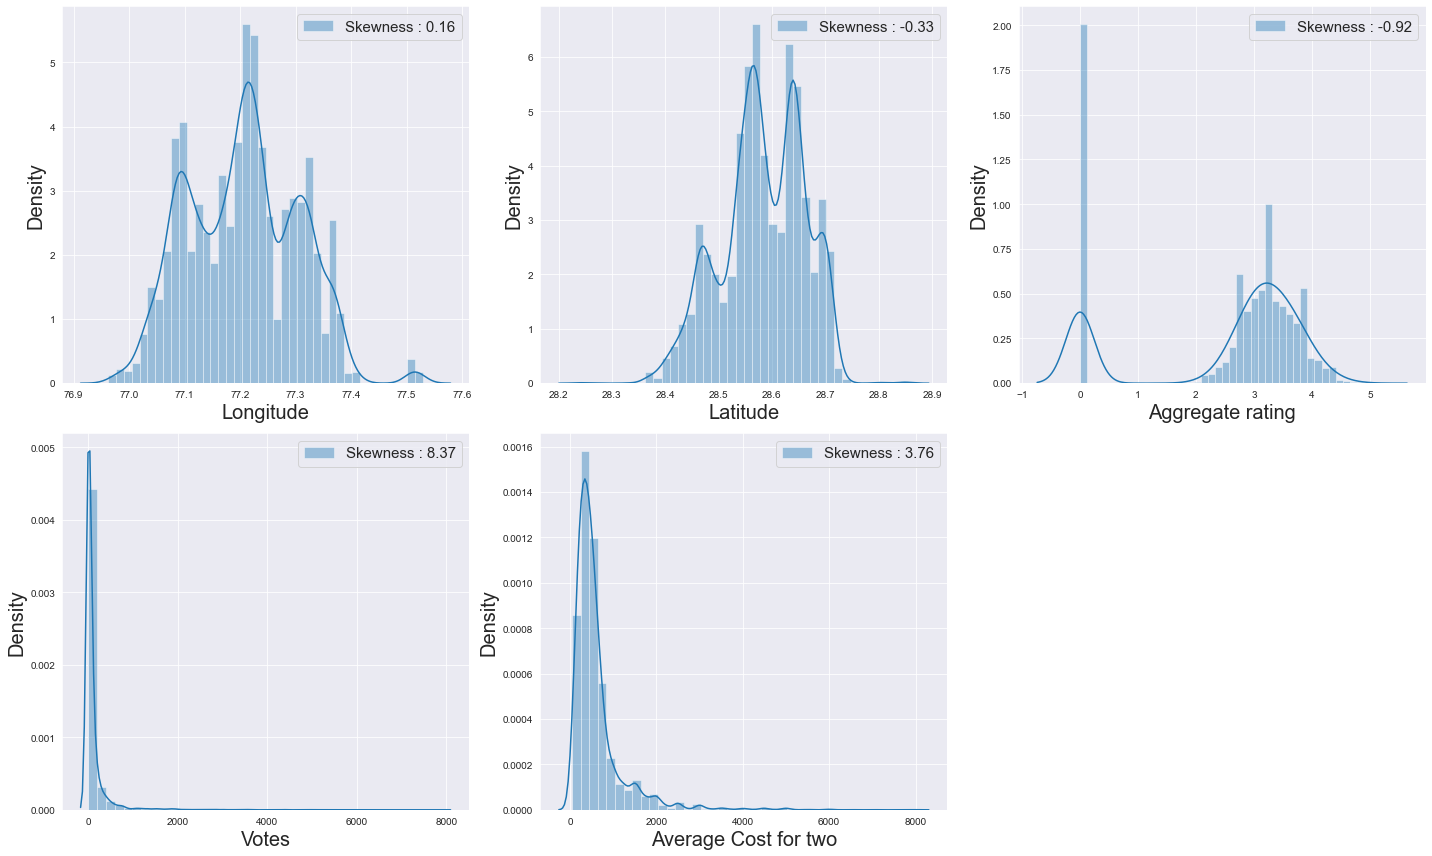

In [373]:
#distribution of numerical features.. 
i=0
plt.figure(figsize=(20,12))
for column in data1_num.columns:
    plt.subplot(2,3,i+1)
    sns.distplot(data1_num[column], bins=40, label="Skewness : %.2f"%(data1_num[column].skew())).legend(loc="best",fontsize = 15)
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Density',fontsize=20)
    i+=1
    
plt.tight_layout()

## Observation:
- Longitude & latitude are cordinates particulary from delhi & nearby regions. the data is normally distributed with skewness within the limits of +/-0.5
- rating is also normally distributed if not considered the zero or non rated restaurants ratings.
- Votes & Average cost distribution is right skewed.

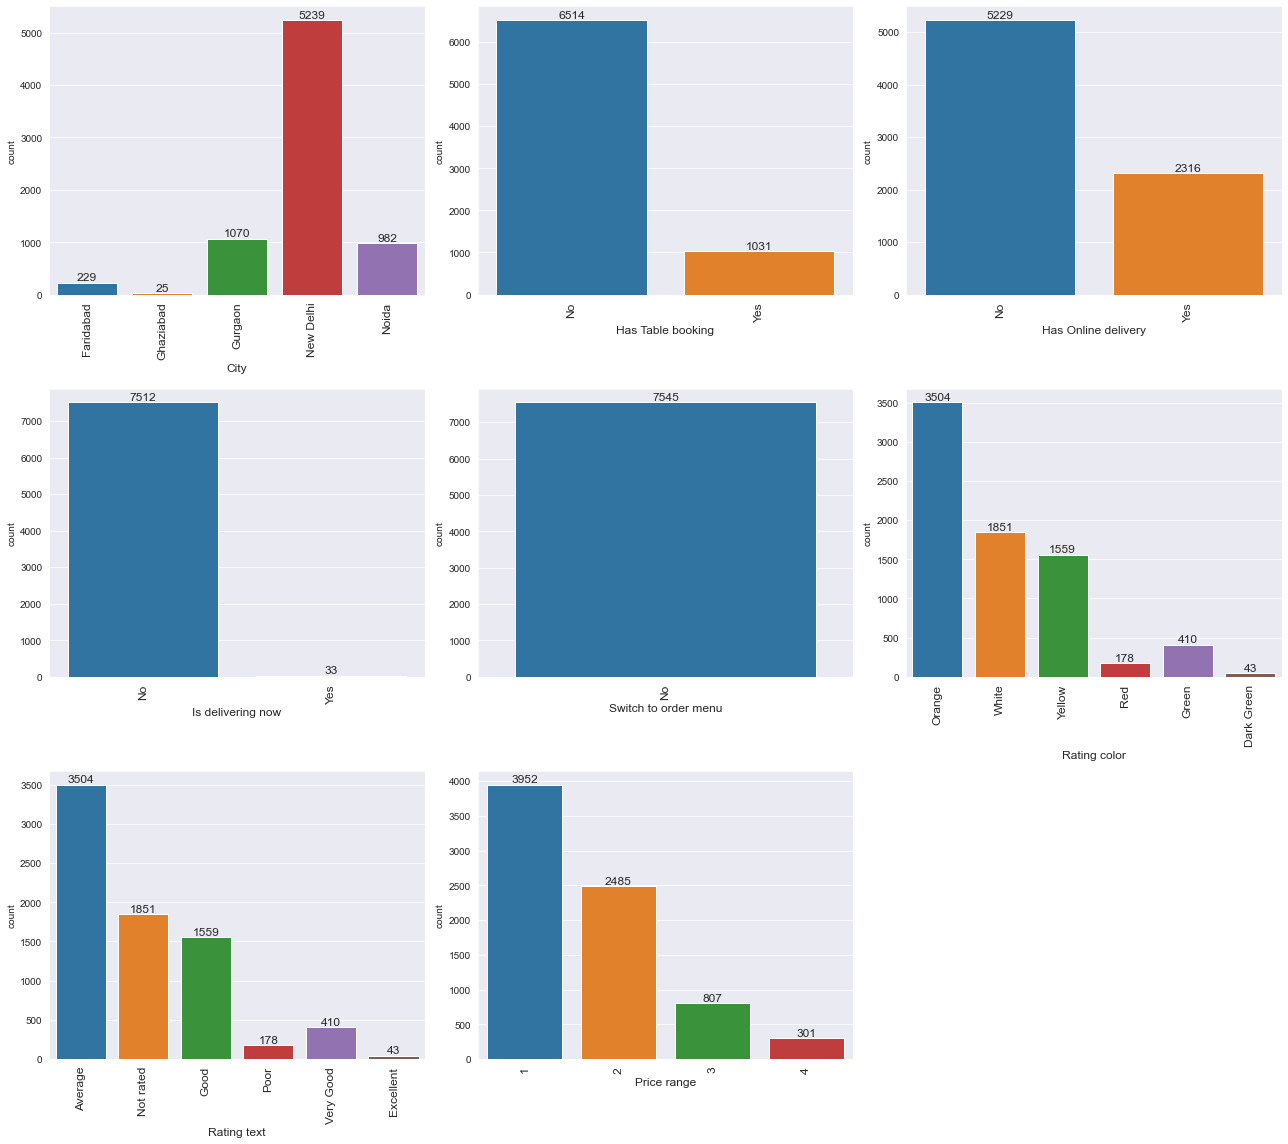

In [374]:
#distribution of numerical features using countplot
i=0
plt.figure(figsize=(18,16))
for column in ['City','Has Table booking','Has Online delivery',
               'Is delivering now','Switch to order menu','Rating color',
               'Rating text','Price range']:
    plt.subplot(3,3,i+1)
#     ax = sns.barplot(x=column,data=data1_cat, errwidth=0)
    ax = sns.countplot(x= data1_cat[column])
    ax.bar_label(ax.containers[0], fontsize = 12);
    plt.xticks(fontsize =12, rotation=90)
    plt.xlabel(column,fontsize=12)
    i+=1
    
plt.tight_layout()

## Observation:
- Most of the data is biased towards delhi based restaurants.
- Almost all the restaurants neither having booking facility nor delivery services.
- More than 24% of the restaurants are not rated & 50% of the restaurants are averaged rated.

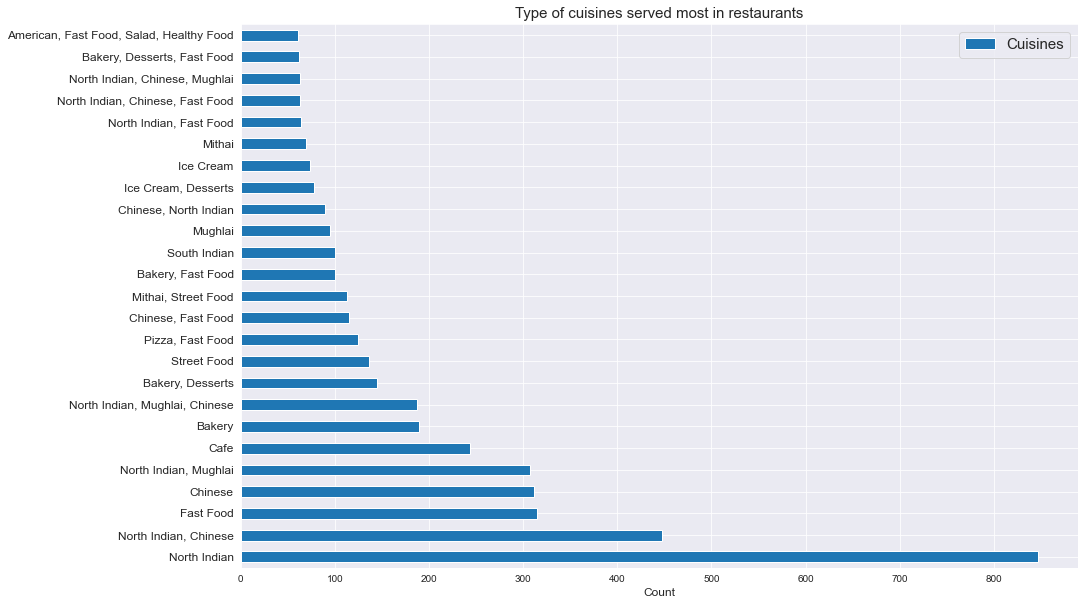

In [375]:
plt.figure(figsize=(15,10))
data1_cat['Cuisines'].value_counts().nlargest(25).plot(kind = 'barh')
plt.title("Type of cuisines served most in restaurants", fontsize = 15)
plt.yticks(fontsize = 12, rotation=0)
plt.xlabel(xlabel = "Count", fontsize = 12)
plt.legend(fontsize = 15)
plt.show()

In [376]:
most_served_cuisines = data4.groupby('Price range')[cuisine_list].sum()

In [377]:
df1 = most_served_cuisines.sum(axis=0)
df1.sort_values(ascending = False)

North Indian      3407
Chinese           2326
Fast Food         1798
Mughlai            889
Bakery             632
                  ... 
Persian              1
Sri Lankan           1
Charcoal Grill       1
Steak                1
Deli                 1
Length: 85, dtype: int64

## Observation:
- North indian & Chinese are the most served cuisines in the restaurant.
- Other continental dishes are served  in selected restaurants only.

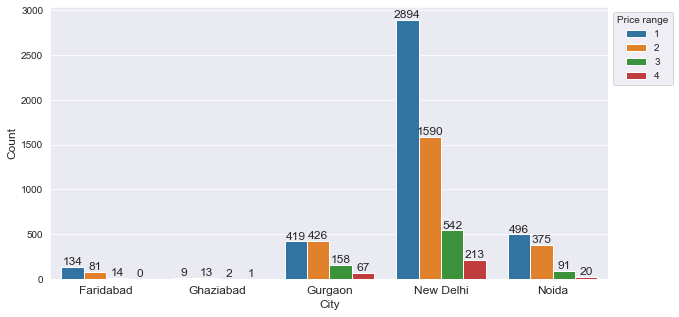

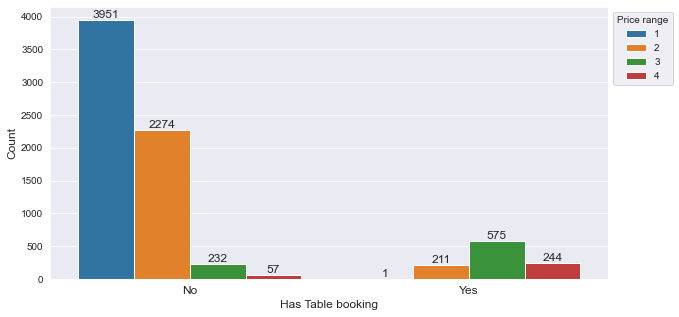

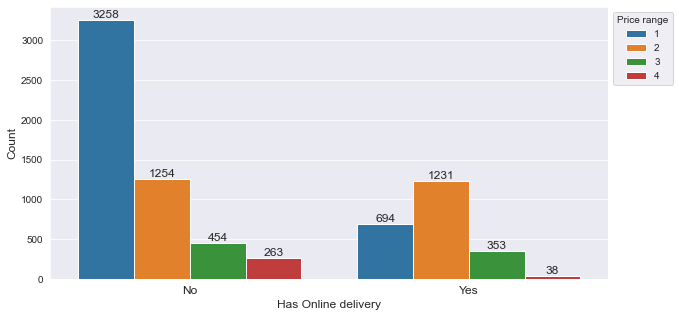

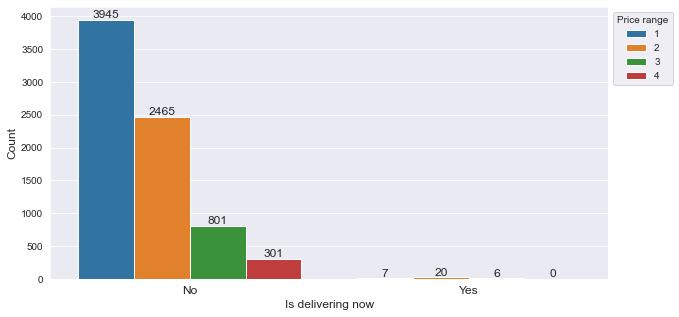

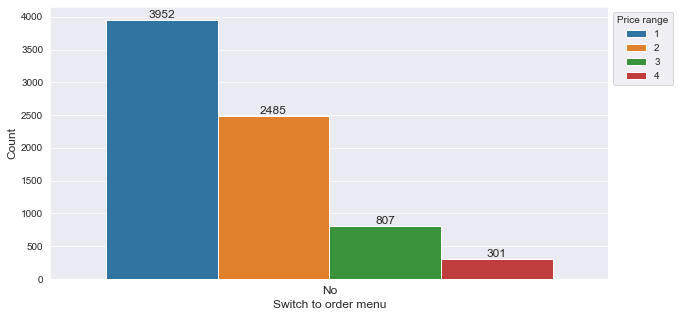

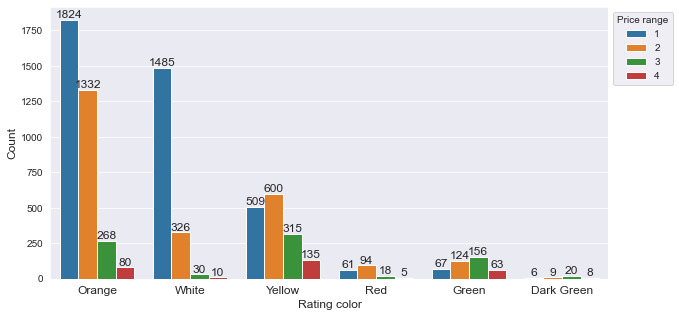

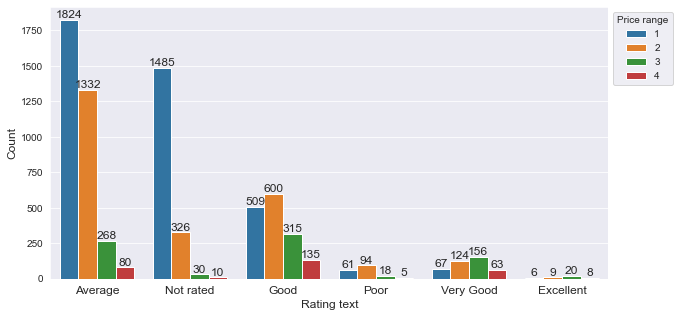

In [378]:
for item in data1_cat[['City','Has Table booking','Has Online delivery',
                       'Is delivering now','Switch to order menu',
                       'Rating color','Rating text']].columns:
    plt.figure(figsize=(10,5))
    ax = sns.countplot(x=item,hue='Price range',data=data1_cat)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.bar_label(ax.containers[0], fontsize = 12);
    ax.bar_label(ax.containers[1], fontsize = 12);
    ax.bar_label(ax.containers[2], fontsize = 12);
    ax.bar_label(ax.containers[3], fontsize = 12);
    plt.xticks(fontsize = 12, rotation=0)
    plt.ylabel(ylabel = 'Count', fontsize = 12)
    plt.xlabel(xlabel = item, fontsize = 12)

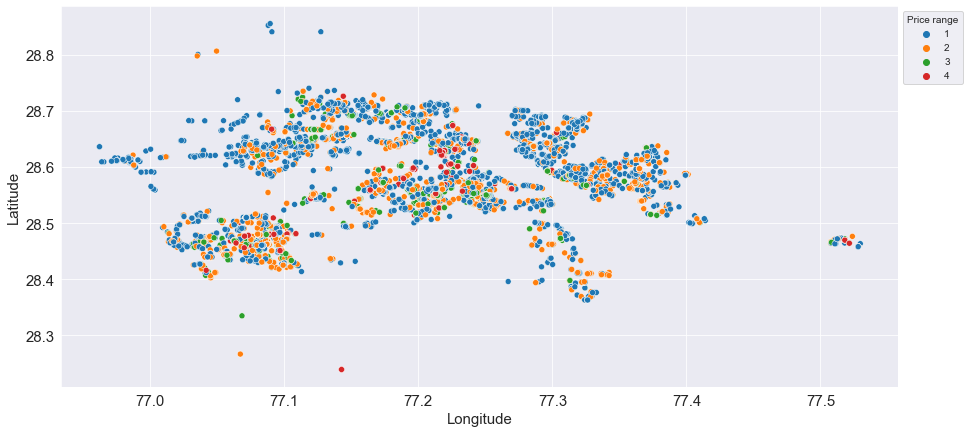

In [379]:
plt.figure(figsize=(15,7))
ax = sns.scatterplot(data = data4, x = 'Longitude',y = 'Latitude', hue='Price range', palette='tab10');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(fontsize = 15, rotation=0)
plt.yticks(fontsize = 15, rotation=0)
plt.ylabel(ylabel = 'Latitude', fontsize = 15)
plt.xlabel(xlabel = 'Longitude', fontsize = 15)
plt.show()

# 'Longitude','Latitude'

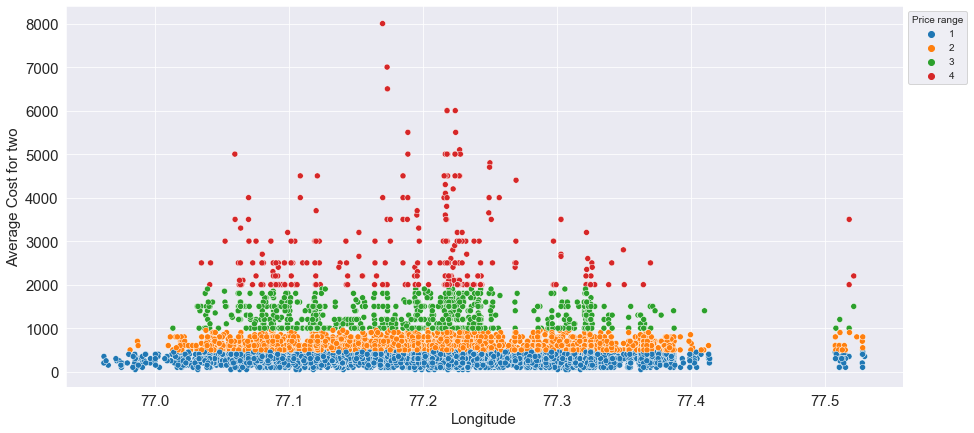

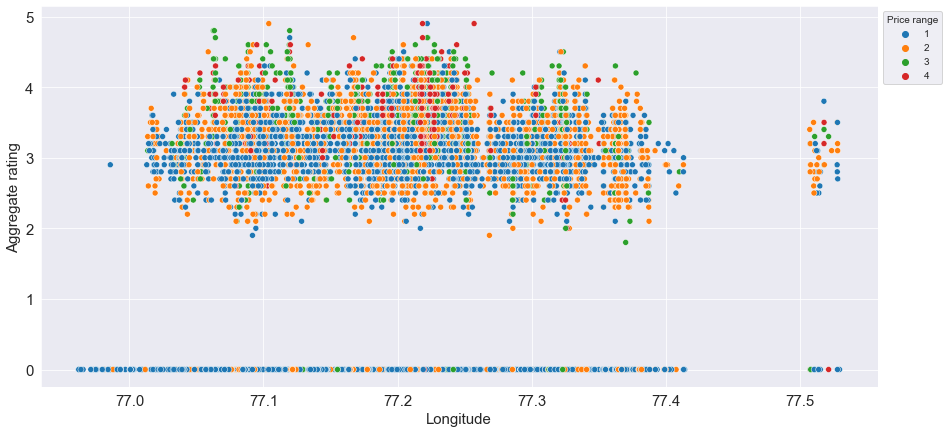

In [380]:
plt.figure(figsize=(15,7))
ax = sns.scatterplot(data = data4, x = 'Longitude',y = 'Average Cost for two', hue='Price range', palette='tab10');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(fontsize = 15, rotation=0)
plt.yticks(fontsize = 15, rotation=0)
plt.ylabel(ylabel = 'Average Cost for two', fontsize = 15)
plt.xlabel(xlabel = 'Longitude', fontsize = 15)
plt.show()

print(' ')
plt.figure(figsize=(15,7))
ax = sns.scatterplot(data = data4, x = 'Longitude',y = 'Aggregate rating', hue='Price range', palette='tab10');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(fontsize = 15, rotation=0)
plt.yticks(fontsize = 15, rotation=0)
plt.ylabel(ylabel = 'Aggregate rating', fontsize = 15)
plt.xlabel(xlabel = 'Longitude', fontsize = 15)
plt.show()

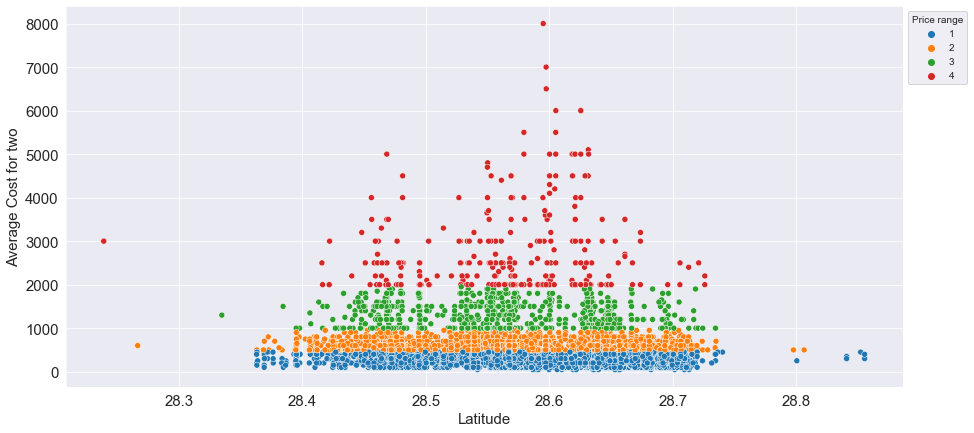

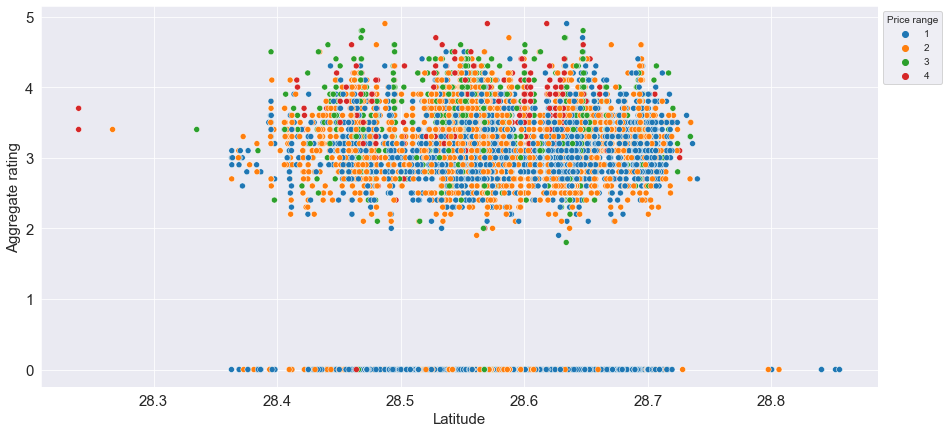

In [381]:
plt.figure(figsize=(15,7))
ax = sns.scatterplot(data = data4, x = 'Latitude',y = 'Average Cost for two', hue='Price range', palette='tab10');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(fontsize = 15, rotation=0)
plt.yticks(fontsize = 15, rotation=0)
plt.ylabel(ylabel = 'Average Cost for two', fontsize = 15)
plt.xlabel(xlabel = 'Latitude', fontsize = 15)
plt.show()

print(' ')
plt.figure(figsize=(15,7))
ax = sns.scatterplot(data = data4, x = 'Latitude',y = 'Aggregate rating', hue='Price range', palette='tab10');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(fontsize = 15, rotation=0)
plt.yticks(fontsize = 15, rotation=0)
plt.ylabel(ylabel = 'Aggregate rating', fontsize = 15)
plt.xlabel(xlabel = 'Latitude', fontsize = 15)
plt.show()

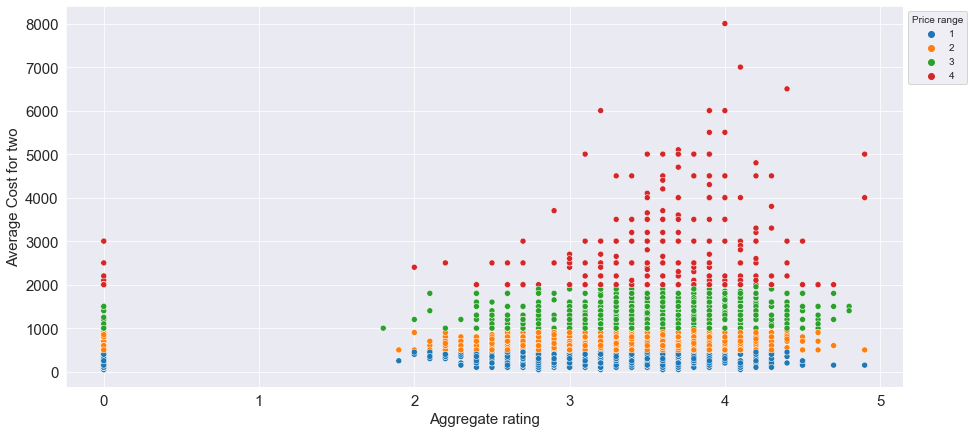

In [382]:
plt.figure(figsize=(15,7))
ax = sns.scatterplot(data = data_eda, x = 'Aggregate rating',y = 'Average Cost for two', hue='Price range', palette='tab10');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(fontsize = 15, rotation=0)
plt.yticks(fontsize = 15, rotation=0)
plt.ylabel(ylabel = 'Average Cost for two', fontsize = 15)
plt.xlabel(xlabel = 'Aggregate rating', fontsize = 15)
plt.show()

## Observation:
- As the rating is higher, higher the price will be.

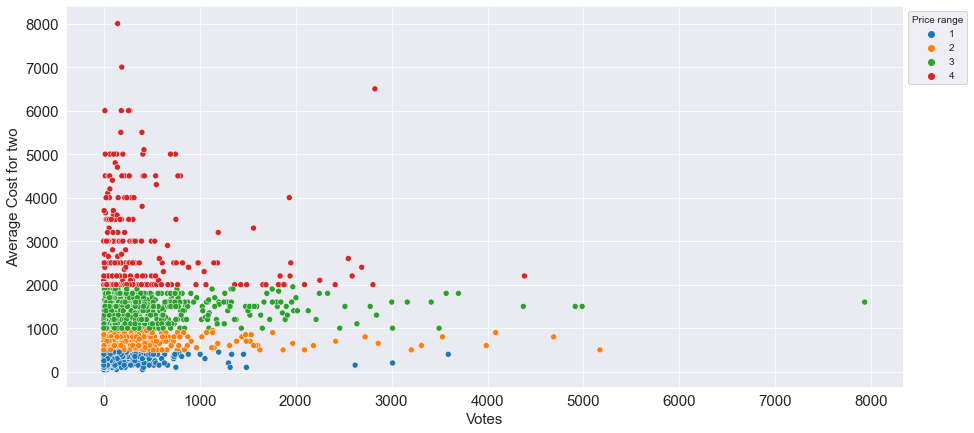

In [383]:
plt.figure(figsize=(15,7))
ax = sns.scatterplot(data = data_eda, x = 'Votes',y = 'Average Cost for two', hue='Price range', palette='tab10');
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(fontsize = 15, rotation=0)
plt.yticks(fontsize = 15, rotation=0)
plt.ylabel(ylabel = 'Average Cost for two', fontsize = 15)
plt.xlabel(xlabel = 'Votes', fontsize = 15)
plt.show()

# Outliers Check

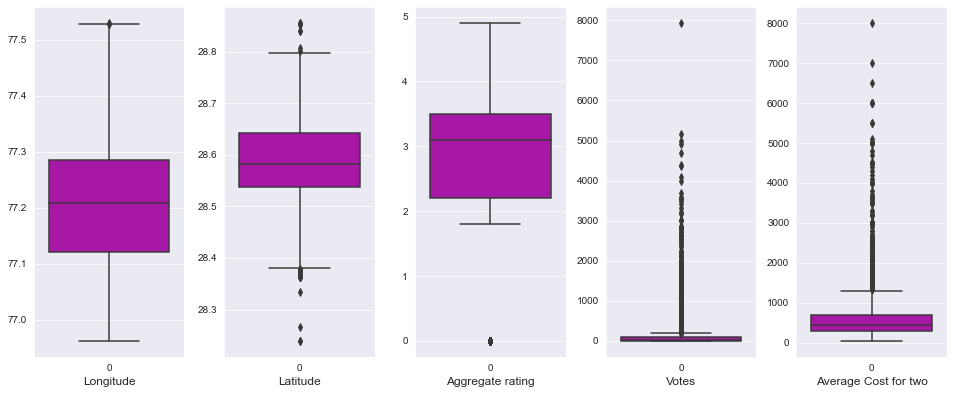

In [384]:
plt.figure(figsize=(16,16))
plotnumber=1
for col in num_cols:
    if plotnumber<=len(num_cols):
        ax=plt.subplot(3,6,plotnumber)
        sns.boxplot(data2[col],color='m')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

## Observation:
- There are some outliers in continuous numerical features. We will check using Standard deviation & IQR method & drop outliers based on data loss..

In [385]:
# creating a function to remove outliers using standard deviation method...
def get_outliers_std(data):
    
    #empty list to store index values
    all_indices = []
    
    for column in data.columns:
        data_mean, data_std = np.mean(data[column]), np.std(data[column])
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off

        index = np.where((data[column] < lower) | (data [column] > upper))

        all_indices.extend(index[0])
    
    set_res = set(all_indices)
    indices_to_remove = np.array(list(set_res))
#     print(indices_to_remove)
    return indices_to_remove #returns list of indices to remove outliers

# data.drop(data.index[indices_to_remove])



#  creating a function to remove outliers using inter quantile range...
def get_outliers_iqr(data):
    
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3-q1
    
    #empty list to store index values
    all_indices = []
    
    for column in data.columns:
#         data_mean, data_std = np.mean(data[column]), np.std(data[column])
#         cut_off = data_std * 3
        lower, upper = (q1[column] - (1.5*iqr[column])) , (q3[column] + (1.5*iqr[column]))

        index = np.where((data[column] < lower) | (data [column] > upper))

        all_indices.extend(index[0])
    
    set_res = set(all_indices)
    indices_to_remove = np.array(list(set_res))
#     print(indices_to_remove)
    return indices_to_remove#data.drop(data.index[indices_to_remove]) #returns the data with removed outliers

 
Total Data Loss if we remove Outliers using 3-Standard Deviation Method:  4.77 %
 


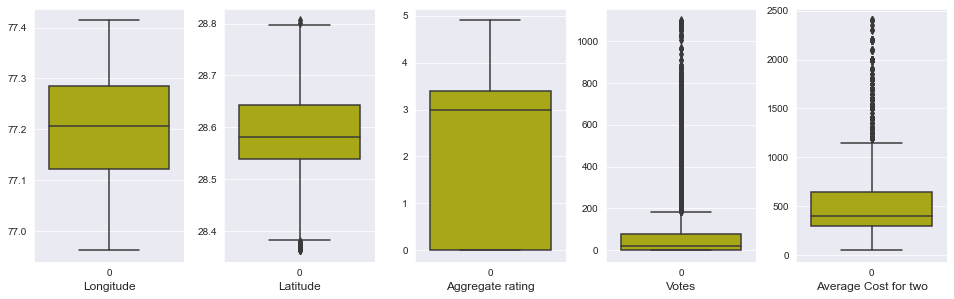

In [395]:
data_out = data4[num_cols]

to_remove_std = get_outliers_std(data_out)
data_out = data_out.drop(data_out.index[to_remove_std])
data4_std = data4.drop(data4.index[to_remove_std])


print(' ')
total_data_loss = (data4.shape[0] - data4_std.shape[0])*100/data4.shape[0]
print('Total Data Loss if we remove Outliers using 3-Standard Deviation Method: ', round(total_data_loss,2),'%')
print(' ')


plt.figure(figsize=(16,12))
plotnumber=1
for col in num_cols:
    if plotnumber<=len(num_cols):
        ax=plt.subplot(3,6,plotnumber)
        sns.boxplot(data_out[col],color='y')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

 
Total Data Loss if we remove Outliers using IQR Method:  41.08 %
 


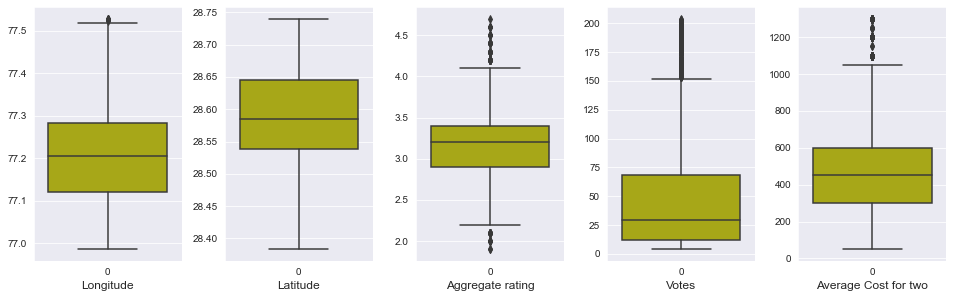

In [396]:
data_out = data4[num_cols]

to_remove_iqr = get_outliers_iqr(data_out)
data_out = data_out.drop(data_out.index[to_remove_iqr])
data4_iqr = data4.drop(data4.index[to_remove_iqr])


print(' ')
total_data_loss = (data4.shape[0] - data4_iqr.shape[0])*100/data4.shape[0]
print('Total Data Loss if we remove Outliers using IQR Method: ', round(total_data_loss,2),'%')
print(' ')


plt.figure(figsize=(16,12))
plotnumber=1
for col in num_cols:
    if plotnumber<=len(num_cols):
        ax=plt.subplot(3,6,plotnumber)
        sns.boxplot(data_out[col],color='y')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

## We will go with 3-Standard Deviation Method of removing outliers as data loss will be less than 5%.

In [397]:
data4_std.reset_index(drop=True, inplace=True)
data4_std

,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Italian,Mithai,Naga,Armenian,Persian,Burger,Beverages,Bakery,Assamese,Maharashtrian,Hyderabadi,Asian,Goan,South Indian,Lucknowi,Spanish,Portuguese,Mangalorean,Indonesian,Bengali,British,Vietnamese,Tibetan,Ice Cream,Drinks Only,Middle Eastern,Juices,North Eastern,Mughlai,Burmese,Pizza,Awadhi,South American,Charcoal Grill,Cafe,Fast Food,Deli,Arabian,Raw Meats,Kerala,Continental,Kashmiri,Greek,Salad,Desserts,Parsi,Finger Food,Gujarati,Mediterranean,American,Pakistani,Seafood,Andhra,Turkish,Indian,Mexican,Chinese,Iranian,Afghani,Bihari,Lebanese,North Indian,Korean,Malaysian,Sandwich,Tea,European,Japanese,Oriya,Belgian,French,Street Food,Sushi,Tex-Mex,African,Nepalese,Modern Indian,Rajasthani,Moroccan,Thai,Sri Lankan,Healthy Food,Steak,Biryani,Chettinad,City_Ghaziabad,City_Gurgaon,City_New Delhi,City_Noida
0,77.306640,28.490059,250,0,0,0,0,1,2.9,2,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77.304776,28.490157,500,0,0,0,0,2,2.8,2,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,77.305563,28.490137,150,0,0,0,0,1,2.8,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,77.306102,28.490098,150,0,0,0,0,1,2.9,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,77.305745,28.490062,100,0,0,0,0,1,2.8,2,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,77.367524,28.557537,700,0,1,0,0,2,2.6,2,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7184,77.367303,28.557929,400,0,0,0,0,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7185,77.367188,28.557842,600,0,0,0,0,2,0.0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7186,77.367322,28.557930,500,0,0,0,0,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Skewness check

In [398]:
data4_std[num_cols].skew()

Longitude              -0.024688
Latitude               -0.341271
Aggregate rating       -0.887287
Votes                   3.475014
Average Cost for two    1.878983
dtype: float64

We will remove skewness using power transformer mothod

In [399]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)
x = pt.fit_transform(data4_std[['Longitude','Latitude','Aggregate rating','Votes']])
x = pd.DataFrame(x, columns=['Longitude','Latitude','Aggregate rating','Votes'])
x.skew()

Longitude          -0.004039
Latitude           -0.035351
Aggregate rating   -0.658881
Votes              -0.005864
dtype: float64

### Observation
**- Due to high number of votes at 0 rating we see Aggregate rating to be skewed a little.**

In [400]:
data4_std[['Longitude','Latitude','Aggregate rating','Votes']] = x

# Standard scaling

In [401]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df_feat = pd.DataFrame(scaler.fit_transform(data4_std.drop(['Average Cost for two','Price range'], axis=1)), columns = data4_std.drop(['Average Cost for two','Price range'], axis=1).columns)

# Data Imbalance check

In [402]:
data4_std['Price range'].value_counts()

1    3912
2    2430
3     735
4     111
Name: Price range, dtype: int64

In [403]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y_class = oversample.fit_resample(df_feat, data4_std['Price range'])

In [404]:
y_class.value_counts()

1    3912
2    3912
3    3912
4    3912
Name: Price range, dtype: int64

<h1 align = "center"><font color = "red">Model Selection : Classification</font></h1>

In [405]:
## TO PLOT CONFUSION MATRIX
def confusion_matrix_c(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("====================")
    print('Confusion Matrix :\n')
    print(cm)
    print("====================")
    
    
## TO PLOT ROC_AUC CURVE
def plot_roc_auc_curve(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    


# TO print classification report, confusion matrx, roc-auc curve
def print_score(clf,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print(f"Accuracy score for Train : {accuracy_score(y_train,y_pred) * 100:.2f}%")
        return round(accuracy_score(y_train,y_pred)*100,2)
#         print('\n \n Train Classification report \n', classification_report(y_train,y_pred, digits=2))
              
    elif train==False:
        y_pred = clf.predict(x_test)
        acc = round(accuracy_score(y_test,y_pred)*100,2)
        print(f"Accuracy score for Test : {accuracy_score(y_test,y_pred) * 100:.2f}%")
        confusion_matrix_c(y_test, y_pred)
        print('\n \n Test Classification report \n', classification_report(y_test, y_pred, digits=2))
        
        diff = []
        best_cv = []
        for j in range(3, 12):
            cv_score = round(cross_val_score(clf, X, y_class, cv=j, scoring="accuracy").mean()*100,2)
            diff.append(abs(cv_score - acc))
            best_cv.append(j)
        k_f = best_cv[diff.index(min(diff))]
        cv_score = cross_val_score(clf,X, y_class, cv=k_f, scoring="accuracy").mean()
        print(f"Cross Validation score at best cv={k_f} is : {cv_score*100:.2f}%")
#         y_predict_probabilities = clf.predict_proba(x_test)[:,1]
#         fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
#         roc_auc = auc(fpr, tpr)
#         plot_roc_auc_curve(fpr, tpr)
        return acc,k_f, min(diff),cv_score*100

In [407]:
dtc = DecisionTreeClassifier()
etc = ExtraTreesClassifier()
gnb = GaussianNB()
knc = KNeighborsClassifier()
lgr = LogisticRegression(multi_class='ovr')
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
bgc = BaggingClassifier()
# svc = SVC(probability=True)

In [408]:
algo = [] #list to save ML algorithm name
rs = []
cv_fold = []
#lists to store evaluation metrics data for train set
train_accuracy = [] 

#lists to store evaluation metrics data for test set
test_accuracy = []

crossvalscore = []
score_diff = []


models = [dtc,etc,gnb,knc,lgr,rfc,gbc,bgc]
models_name = ['Decision Tree Classifier','Extra Trees Classifier','Gaussian NB Classifier','KNeighbors Classifier','Logistic Regression',
               'Random Forest Classifier','Gradient Boosting Classifier', 'Bagging Classifier']
dummy_count = 0 #dummy variable for count purpose
for model in models:
    diff = []
    randomstate = []
    for i in range(0, 150):  ### loop to find best random state for splitting
        x_train, x_test, y_train, y_test = train_test_split(X, y_class, test_size = 0.25, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        diff.append(abs(accuracy_score(y_train, pred_train) - accuracy_score(y_test, pred_test)))
        randomstate.append(i)
        
    best_i = randomstate[diff.index(min(diff))]
    rs.append(best_i)
    print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
    print(' ')
    print(' ')
    print('for '+ models_name[dummy_count] + ' model..')
    print(' ')
    print("Best Random_state number for splitting the data is: ", best_i)
    print(' ')
    
    ### splitting with best random state
    x_train, x_test, y_train, y_test = train_test_split(X, y_class, random_state=best_i, test_size=.25)
    
    
    ### training the model
    model.fit(x_train, y_train)
    algo.append(models_name[dummy_count])
    tr_ac = print_score(model, x_train, x_test, y_train, y_test, train=True)
    train_accuracy.append(tr_ac)
    test_ac, k_f, sc_diff, cvs = print_score(model, x_train, x_test, y_train, y_test, train=False)
    cv_fold.append(k_f)
    score_diff.append(sc_diff)
    test_accuracy.append(test_ac)
    crossvalscore.append(cvs)
#     print(cv_fold)
#     print(score_diff)
    dummy_count+=1

    
### dataframe to make list of all the ML algorithms & their evaluation metrics
table = pd.DataFrame(list(zip(algo, rs, train_accuracy, test_accuracy, score_diff, cv_fold, crossvalscore)),
                              columns =['algo', 'best random state', 'train_accuracy', 'test_accuracy', 'Score_diff','best cv fold', 'cross_val_score'])


### display dataframe & sort based on TEST MAE score.
table.sort_values(by=['Score_diff', 'test_accuracy', 'cross_val_score' ])

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Decision Tree Classifier model..
 
Best Random_state number for splitting the data is:  121
 
Accuracy score for Train : 99.99%
Accuracy score for Test : 82.18%
Confusion Matrix :

[[761 202  13   0]
 [205 699  69   8]
 [ 15  74 794  60]
 [  2   6  43 961]]

 
 Test Classification report 
               precision    recall  f1-score   support

           1       0.77      0.78      0.78       976
           2       0.71      0.71      0.71       981
           3       0.86      0.84      0.85       943
           4       0.93      0.95      0.94      1012

    accuracy                           0.82      3912
   macro avg       0.82      0.82      0.82      3912
weighted avg       0.82      0.82      0.82      3912

Cross Validation score at best cv=11 is : 79.04%
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Extra Trees Classifier model..
 
Best Random_state number for split

,algo,best random state,train_accuracy,test_accuracy,Score_diff,best cv fold,cross_val_score
2,Gaussian NB Classifier,98,39.55,39.54,0.00,10,39.544900
7,Bagging Classifier,52,99.11,85.63,2.08,11,83.461796
4,Logistic Regression,25,68.98,68.97,2.17,11,66.800961
1,Extra Trees Classifier,55,99.99,90.41,2.26,11,88.152404
3,KNeighbors Classifier,45,89.82,86.76,2.33,11,84.432937
5,Random Forest Classifier,54,100.00,89.47,3.01,10,86.400685
0,Decision Tree Classifier,121,99.99,82.18,3.27,11,79.039449
6,Gradient Boosting Classifier,54,82.10,81.77,4.40,11,77.370977


## Observation:
- We will select **Extra Trees Classifier** As our classification model as:
     - it has highest test accuracy & cross validation score.
     - Second highest in training set acuuracy score.

<h1 align = "center"><font color = "red">Hyper parameter tuning for classification model</font></h1>

In [409]:
x_train, x_test, y_train, y_test = train_test_split(X, y_class, test_size = 0.25, random_state = 55)

In [410]:
param_grid_etc = {'n_estimators':[100,200,300],
                  'criterion':["gini", "entropy"],
                  'max_depth':[None,1,2,3],
                  'min_samples_split':[1,2,3],
                  'min_samples_leaf':[1, 2, 3]
                 }

In [411]:
etc_grid = GridSearchCV(estimator = etc,
                       param_grid = param_grid_etc,
                       verbose = 2,
                       scoring = 'accuracy')

In [412]:
etc_grid.fit(x_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=200; tot

[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   2.9s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   3.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   3.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   3.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   2.7s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.8s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.8s
[CV] END criterion=gini, max_depth=None, min_sam

[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_sp

[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_sp

[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_sp

[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_sp

[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_sp

[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_sp

[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   1.3s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   1.8s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   1.4s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   1.3s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   1.3s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   2.9s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   2.9s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   2.8s
[CV] END criterion=entro

[CV] END criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END criterion=entro

[CV] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=1, min_sam

[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=1, min_sam

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=   0.6s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=   0.6s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=   0.6s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=   0.6s
[CV] END criterion=entropy, max_depth=2, min_sam

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=2, min_sam

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=   0.7s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=   0.7s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=   0.7s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=   0.7s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=   0.7s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_sam

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END criterion=entropy, max_depth=3, min_sam

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [413]:
etc_grid.best_score_

0.8887187892187569

In [414]:
etc_grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [415]:
etc_final = ExtraTreesClassifier(criterion='entropy',
                                 max_depth=None,
                                 min_samples_leaf=1,
                                 min_samples_split=3,
                                 n_estimators= 200)

In [416]:
etc_final.fit(x_train,y_train)
y_pred=etc_final.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Accuracy Score:  0.9066973415132924


In [417]:
confusion_matrix_c(y_test, y_pred)
print('\n \n Test Classification report \n', classification_report(y_test, y_pred, digits=2))

cv_score = cross_val_score(etc_final,X, y_class, cv=11, scoring="accuracy").mean()
print(f"Cross Validation score at best cv = 11 is : {cv_score*100:.2f}%")
# y_predict_probabilities = etc_final.predict_proba(x_test)[:,1]
# fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
# roc_auc = auc(fpr, tpr)
# plot_roc_auc_curve(fpr, tpr)

Confusion Matrix :

[[827 127   4   0]
 [142 788  51   5]
 [  6  21 938   9]
 [  0   0   0 994]]

 
 Test Classification report 
               precision    recall  f1-score   support

           1       0.85      0.86      0.86       958
           2       0.84      0.80      0.82       986
           3       0.94      0.96      0.95       974
           4       0.99      1.00      0.99       994

    accuracy                           0.91      3912
   macro avg       0.91      0.91      0.91      3912
weighted avg       0.91      0.91      0.91      3912

Cross Validation score at best cv = 11 is : 88.18%


## Observation:
- After **Hyper parameter tuning** accuracy & ceoss validation scores are increased.

<h1 align = "center"><font color = "red">classification model Saving & predicting for test set.</font></h1>

In [418]:
filename='Zomato_price_range.pkl'
pickle.dump(etc_final,open(filename,'wb'))

In [419]:
model =pickle.load(open('Zomato_price_range.pkl','rb'))
pred =model.predict(x_test)
result = pd.DataFrame(list(zip(y_test, pred)), columns = ['Actual', 'Predicted'])
result

,Actual,Predicted
0,2,2
1,2,2
2,4,4
3,4,4
4,3,3
...,...,...
3907,1,1
3908,2,2
3909,3,3
3910,3,3


<h1 align = "center"><font color = "red">Model Selection : Regression</font></h1>

In [420]:
Xr = df_feat.copy()
y_reg = data4_std['Average Cost for two']

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
Linear Regression Model
 
for Linear Regression model, Best Random_state number for splitting the data is:  15
 
===scores for training set===
r2 score for training set 69.2474429962557
MAE for training set:  147.17675969420063
MSE for training set:  46381.21512507517
SMSE for training set:  215.36298457505453
 
===scores for testing set===
r2 score for testing set :  69.18220283903138
MAE for testing set:  150.90223946557296
MSE for testing set:  48693.901085722675
SMSE for testing set:  220.66694606515648
 
 


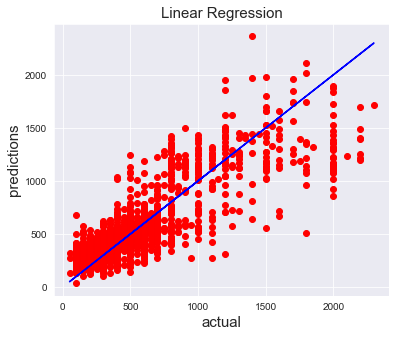

 
Cross Validation score at best cv=4 is : -3216662155510904387526459392.00%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
Lasso Model
 
for Lasso model, Best Random_state number for splitting the data is:  31
 
===scores for training set===
r2 score for training set 69.19733448966758
MAE for training set:  148.6581632208838
MSE for training set:  47267.16267586193
SMSE for training set:  217.41012551365205
 
===scores for testing set===
r2 score for testing set :  69.25548941637463
MAE for testing set:  150.00990175755194
MSE for testing set:  46209.23777835398
SMSE for testing set:  214.96334054520548
 
 


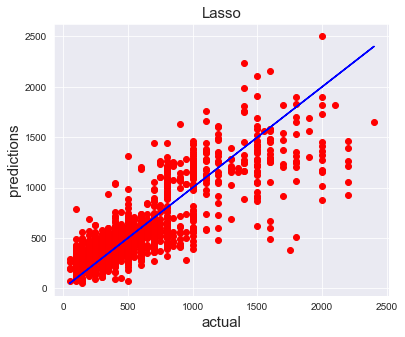

 
Cross Validation score at best cv=7 is : 66.80%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
Ridge Model
 
for Ridge model, Best Random_state number for splitting the data is:  62
 
===scores for training set===
r2 score for training set 68.93368702561204
MAE for training set:  148.0407915065013
MSE for training set:  46577.33066736369
SMSE for training set:  215.81781823418495
 
===scores for testing set===
r2 score for testing set :  68.94100669257797
MAE for testing set:  151.99591209750375
MSE for testing set:  49989.82593714247
SMSE for testing set:  223.58404669641004
 
 


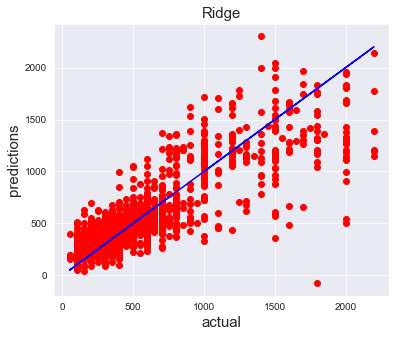

 
Cross Validation score at best cv=7 is : 66.50%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
Ada-Boost Regressor Model
 
for Ada-Boost Regressor model, Best Random_state number for splitting the data is:  37
 
===scores for training set===
r2 score for training set 45.37704959873666
MAE for training set:  234.266468046413
MSE for training set:  82252.72455214025
SMSE for training set:  286.7973579936542
 
===scores for testing set===
r2 score for testing set :  44.786809168384245
MAE for testing set:  239.9671929306777
MSE for testing set:  87783.18306359164
SMSE for testing set:  296.2822692359292
 
 


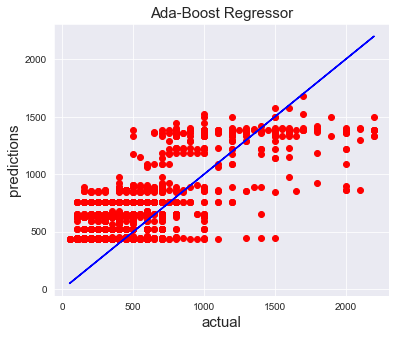

 
Cross Validation score at best cv=12 is : 45.44%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
Gradient Boosting Regressor Model
 
for Gradient Boosting Regressor model, Best Random_state number for splitting the data is:  18
 
===scores for training set===
r2 score for training set 74.27668830485973
MAE for training set:  140.16044479485058
MSE for training set:  38794.182263316005
SMSE for training set:  196.96238794073352
 
===scores for testing set===
r2 score for testing set :  73.62211848897596
MAE for testing set:  142.09583114346245
MSE for testing set:  41750.92530413973
SMSE for testing set:  204.3304316643503
 
 


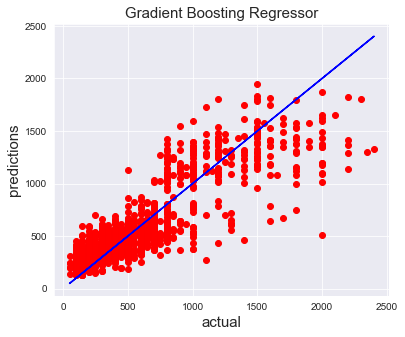

 
Cross Validation score at best cv=7 is : 68.78%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
Decision Tree Regressor Model
 
for Decision Tree Regressor model, Best Random_state number for splitting the data is:  18
 
===scores for training set===
r2 score for training set 99.98754665618449
MAE for training set:  0.08347245409015025
MSE for training set:  18.781302170283805
SMSE for training set:  4.333739974927408
 
===scores for testing set===
r2 score for testing set :  53.37758121944369
MAE for testing set:  179.87757373400112
MSE for testing set:  73793.98998330551
SMSE for testing set:  271.6504923303205
 
 


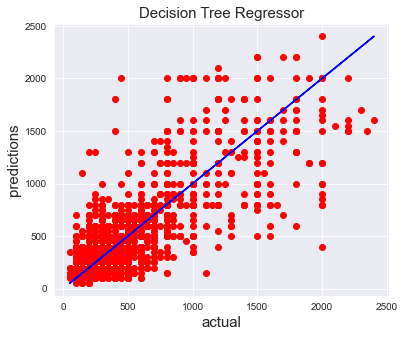

 
Cross Validation score at best cv=8 is : 40.30%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
Support Vector Machine Model
 
for Support Vector Machine model, Best Random_state number for splitting the data is:  33
 
===scores for training set===
r2 score for training set 19.01163577915701
MAE for training set:  216.01695172028167
MSE for training set:  124442.84643437593
SMSE for training set:  352.76457650163223
 
===scores for testing set===
r2 score for testing set :  19.00891547185767
MAE for testing set:  217.11619505820988
MSE for testing set:  121306.70188241506
SMSE for testing set:  348.2911165712026
 
 


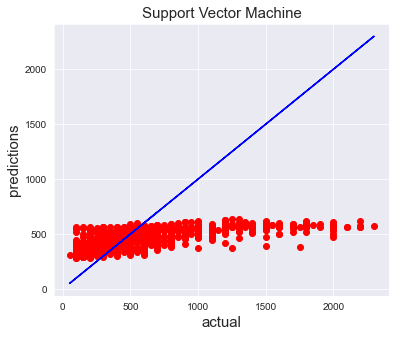

 
Cross Validation score at best cv=6 is : 19.05%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
KNeighbors Regressor Model
 
for KNeighbors Regressor model, Best Random_state number for splitting the data is:  18
 
===scores for training set===
r2 score for training set 75.8842552911806
MAE for training set:  123.94435169727323
MSE for training set:  36369.757002411425
SMSE for training set:  190.7085656241256
 
===scores for testing set===
r2 score for testing set :  69.7765017304155
MAE for testing set:  145.53144129104064
MSE for testing set:  47837.76961602671
SMSE for testing set:  218.71847113590272
 
 


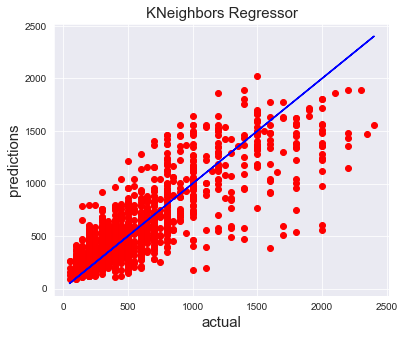

 
Cross Validation score at best cv=4 is : 64.57%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
XGB Regressor Model
 
for XGB Regressor model, Best Random_state number for splitting the data is:  10
 
===scores for training set===
r2 score for training set 89.85841484173017
MAE for training set:  87.51578334779337
MSE for training set:  14929.506155035504
SMSE for training set:  122.18635830171674
 
===scores for testing set===
r2 score for testing set :  73.65169981986675
MAE for testing set:  145.8130805090393
MSE for testing set:  44522.43862065543
SMSE for testing set:  211.00340902614687
 
 


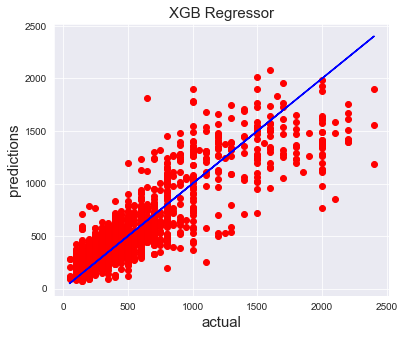

 
Cross Validation score at best cv=8 is : 67.94%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
Random Forest Regressor Model
 
for Random Forest Regressor model, Best Random_state number for splitting the data is:  18
 
===scores for training set===
r2 score for training set 95.69929180817755
MAE for training set:  53.62567241699128
MSE for training set:  6486.041122240771
SMSE for training set:  80.53596167080127
 
===scores for testing set===
r2 score for testing set :  74.23395975242953
MAE for testing set:  137.15852810239286
MSE for testing set:  40782.50261720924
SMSE for testing set:  201.94678164607933
 
 


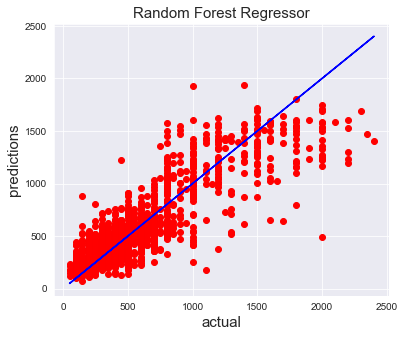

 
Cross Validation score at best cv=7 is : 69.11%
 
 


,Model,Best_Random_State,Train_r2_Score,Test_r2_Score,Train_MAE,Train_MSE,Train_SMSE,Test_MAE,Test_MSE,Test_SMSE,Best_CV_Fold,Cross_Val_Score
Sr. No.,,,,,,,,,,,,
10,Random Forest Regressor,18,95.70,74.23,53.63,6486.04,80.54,137.16,40782.50,201.95,7,6.900000e+01
5,Gradient Boosting Regressor,18,74.28,73.62,140.16,38794.18,196.96,142.10,41750.93,204.33,7,6.900000e+01
8,KNeighbors Regressor,18,75.88,69.78,123.94,36369.76,190.71,145.53,47837.77,218.72,4,6.500000e+01
9,XGB Regressor,10,89.86,73.65,87.52,14929.51,122.19,145.81,44522.44,211.00,8,6.800000e+01
2,Lasso,31,69.20,69.26,148.66,47267.16,217.41,150.01,46209.24,214.96,7,6.700000e+01
1,Linear Regression,15,69.25,69.18,147.18,46381.22,215.36,150.90,48693.90,220.67,4,-3.216662e+27
3,Ridge,62,68.93,68.94,148.04,46577.33,215.82,152.00,49989.83,223.58,7,6.600000e+01
6,Decision Tree Regressor,18,99.99,53.38,0.08,18.78,4.33,179.88,73793.99,271.65,8,4.000000e+01
7,Support Vector Machine,33,19.01,19.01,216.02,124442.85,352.76,217.12,121306.70,348.29,6,1.900000e+01


In [421]:
lr = LinearRegression()
ls = Lasso()
rd = Ridge()
rfr = RandomForestRegressor()
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
knr = KNeighborsRegressor()
xgb = XGBRegressor()




algo = [] #list to save ML algorithm name
rs = []
cv_fold = []
#lists to store evaluation metrics data for train set
train_r2score = [] 
train_mae = []
train_mse = []
train_srmse = []


#lists to store evaluation metrics data for test set
test_r2score = []
test_mae = []
test_mse = []
test_srmse = []

crossvalscore = []
score_diff = []


models = [lr, ls, rd, abr, gbr, dtr,svr, knr, xgb, rfr]
models_name = ['Linear Regression', 'Lasso', 'Ridge',
               'Ada-Boost Regressor', 'Gradient Boosting Regressor',
               'Decision Tree Regressor','Support Vector Machine', 'KNeighbors Regressor', 'XGB Regressor', 'Random Forest Regressor']
dummy_count = 0 #dummy variable for count purpose
for model in models:
    diff = []
    randomstate = []
    for i in range(0, 100):  ### loop to find best random state for splitting
        x_train, x_test, y_train, y_test = train_test_split(Xr, y_reg, test_size = 0.25, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        diff.append(abs(r2_score(y_train, pred_train) - r2_score(y_test, pred_test)))
        randomstate.append(i)
        
    best_i = randomstate[diff.index(min(diff))]
    rs.append(best_i)
    
    ### splitting the train7 set with best random state
    x_train, x_test, y_train, y_test = train_test_split(Xr, y_reg, random_state=best_i, test_size=.25)
    
    
    ### straining the model
    model.fit(x_train, y_train)
    algo.append(models_name[dummy_count])
    pred_test = model.predict(x_test)
    pred_train = model.predict(x_train)
    
     ### storing metrics into respective lists
    train_r2score.append(round(r2_score(y_train, pred_train)*100,2))
    train_mae.append(round(mean_absolute_error(y_train, pred_train),2))
    train_mse.append(round(mean_squared_error(y_train, pred_train),2))
    train_srmse.append(round(np.sqrt(mean_squared_error(y_train, pred_train)),2))
    
    
    test_r2score.append(round(r2_score(y_test, pred_test)*100,2))
    test_mae.append(round(mean_absolute_error(y_test, pred_test),2))
    test_mse.append(round(mean_squared_error(y_test, pred_test),2))
    test_srmse.append(round(float(np.sqrt(mean_squared_error(y_test, pred_test))),2))
    
    
    ##showing the results in output
    print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
    print(' ')
    print(' ')
    print(models_name[dummy_count] + ' Model')
    print(' ')
    print('for '+ models_name[dummy_count] + ' model, Best Random_state number for splitting the data is: ', best_i)
    print(' ')
    print('===scores for training set===')
    print('r2 score for training set', r2_score(y_train, pred_train)*100)
    print('MAE for training set: ', mean_absolute_error(y_train, pred_train))
    print('MSE for training set: ', mean_squared_error(y_train, pred_train))
    print('SMSE for training set: ', np.sqrt(mean_squared_error(y_train, pred_train)))
    print(' ')
    print('===scores for testing set===')
    print('r2 score for testing set : ', r2_score(y_test, pred_test)*100)
    print('MAE for testing set: ', mean_absolute_error(y_test, pred_test))
    print('MSE for testing set: ', mean_squared_error(y_test, pred_test))
    print('SMSE for testing set: ', np.sqrt(mean_squared_error(y_test, pred_test)))
    print(' ')
    print(' ')
    
    ##plotting the graph with bestfit line, actual & predicted values
    plt.figure(figsize = (6,5))
    plt.scatter(x = y_test, y=pred_test, color = 'r')
    plt.plot(y_test, y_test, color = 'b')
    plt.xlabel('actual', fontsize = 15)
    plt.ylabel('predictions', fontsize = 15)
    plt.title(models_name[dummy_count], fontsize = 15)
    plt.show()
    
    print(' ')
    
    test_accuracy = r2_score(y_test, pred_test)
    cv_diff = []
    best_cv = []
    
    ### loop to find best CV fold value
    for j in range(4,13):
        cv_score = cross_val_score(model, Xr, y_reg, cv = j)
        cv_mean = cv_score.mean()
        cv_diff.append(abs(cv_mean - test_accuracy))
        best_cv.append(j)
    
    
    ### printing CV Score based on best CV fold value
    k_f = best_cv[cv_diff.index(min(cv_diff))]
    cv_fold.append(k_f)
    cv_score = cross_val_score(model, Xr, y_reg, cv=k_f).mean()
    crossvalscore.append(round(cv_score,2)*100)
    score_diff.append(abs(round(cv_score - test_accuracy,2)))
    print(f"Cross Validation score at best cv={k_f} is : {cv_score*100:.2f}%")          
    dummy_count+=1
    print(' ')
    print(' ')
#     print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
    

### dataframe to make list of all the ML algorithms & their evaluation metrics
table = pd.DataFrame(list(zip(algo, rs, train_r2score, test_r2score, train_mae, train_mse,
                              train_srmse, test_mae, test_mse, test_srmse, cv_fold, crossvalscore)),
                              columns =['Model', 'Best_Random_State', 'Train_r2_Score', 'Test_r2_Score', 'Train_MAE','Train_MSE',
                                       'Train_SMSE', 'Test_MAE', 'Test_MSE', 'Test_SMSE', 'Best_CV_Fold', 'Cross_Val_Score'],
                              index=pd.RangeIndex(start=1, stop=(len(algo)+1), name='Sr. No.'))


### display dataframe & sort based on TEST MAE score.
table.sort_values(by=['Test_MAE', 'Test_r2_Score', 'Cross_Val_Score', 'Test_SMSE', 'Test_MSE' ])

## Observation:
- We will select **Random Forest Regressor** As our Regression model as:
     - it has lowest test MAE & SMSE values.
     - Highest r2 score in test, Cross validation & training set

<h1 align = "center"><font color = "red">Hyper parameter tuning : Regression</font></h1>

In [422]:
x_train, x_test, y_train, y_test = train_test_split(Xr, y_reg, test_size = 0.25, random_state = 18)

In [423]:
param_grid_rfr = {'n_estimators': [100,200, 300, 400, 500],
                  'max_depth':[None,2,3,5],
                  'min_samples_split' : [2, 3, 4, 5]
                 }

In [424]:
rfr_grid = GridSearchCV(estimator = rfr,
                       param_grid = param_grid_rfr,
                       verbose = 2,
                       scoring = 'r2')

In [425]:
rfr_grid.fit(x_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   4.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   4.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   4.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   6.7s
[CV] END max_depth=None, 

[CV] END max_depth=None, min_samples_split=5, n_estimators=500; total time=  11.0s
[CV] END max_depth=None, min_samples_split=5, n_estimators=500; total time=  10.7s
[CV] END .max_depth=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END .max_depth=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END .max_depth=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END .max_depth=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END .max_depth=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END .max_depth=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END .max_depth=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END .max_depth=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END .max_depth=2, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END .max_depth=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END .max_depth=2, m

[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=300; total time=   1.5s
[CV] END .max_depth=3, min_s

[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time=   2.1s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time=   2.1s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time=   2.0s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time=   2.1s
[CV] END .max_depth=5, min_s

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 2, 3, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='r2', verbose=2)

In [427]:
rfr_grid.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}

In [428]:
rfr_grid.best_score_

0.6915425036492735

In [429]:
rfr_tune_final = RandomForestRegressor(max_depth=None,
                                       min_samples_split= 2,
                                       n_estimators=500)

In [430]:
rfr_tune_final.fit(x_train,y_train)
y_pred=rfr_tune_final.predict(x_test)

In [431]:
print('r2 score for testing set : ', r2_score(y_test, y_pred))
print('MAE for testing set: ', mean_absolute_error(y_test, y_pred))
print('MSE for testing set: ', mean_squared_error(y_test, y_pred))
print('SMSE for testing set: ', np.sqrt(mean_squared_error(y_test, y_pred)))

r2 score for testing set :  0.7454062721590972
MAE for testing set:  136.4027100723428
MSE for testing set:  40297.10918803561
SMSE for testing set:  200.74139878967569


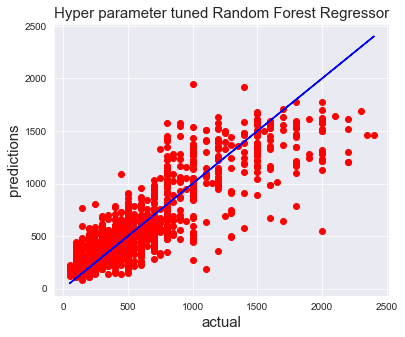

In [432]:
##plotting the graph with bestfit line, actual & predicted values
plt.figure(figsize = (6,5))
plt.scatter(x =y_test, y=y_pred, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('Hyper parameter tuned Random Forest Regressor', fontsize = 15)
plt.show()

In [433]:
cv_score = cross_val_score(rfr_tune_final, Xr, y_reg, cv=7).mean()
print(f"Cross Validation score at best cv=7 is : {cv_score*100:.2f}%")

Cross Validation score at best cv=7 is : 69.36%


## Observation:
- After **Hyper parameter tuning** the r2 score & cross validation scores were increased.

<h1 align = "center"><font color = "red">Saving Regression model & predicting on test set</font></h1>

In [434]:
filename='Zomato_price_for_two.pkl'
pickle.dump(rfr_tune_final,open(filename,'wb'))

In [435]:
model =pickle.load(open('Zomato_price_for_two.pkl','rb'))
pred =model.predict(x_test)
result = pd.DataFrame(list(zip(y_test, pred)), columns = ['Actual', 'Predicted'])
result

,Actual,Predicted
0,500,544.0
1,200,155.2
2,1500,1594.2
3,300,328.9
4,700,416.3
...,...,...
1792,500,391.7
1793,150,272.2
1794,400,260.2
1795,350,423.7
